In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib
import folium
from sqlalchemy import create_engine
from shapely.geometry import shape
from io import BytesIO
import base64

from dotenv import load_dotenv
import os
import json

# .env 파일을 찾아 환경 변수로 로드
load_dotenv()

# 환경 변수 가져오기
host = os.getenv("DB_HOST")
user = os.getenv("DB_USER")
password = os.getenv("DB_PASSWORD")
database = os.getenv("DB_NAME")

# ▶️ MySQL 연결
engine = create_engine(f"mysql+pymysql://{user}:{password}@{host}:3306/{database}")


In [8]:
# ▶️ animal_hospital_registry 등록 데이터 가져오기
query = """
SELECT *
FROM animal_hospital_registry
"""
df = pd.read_sql(query, engine)
df

,id,number,service_name_open,service_id_open,open_gov_code,mgmt_num,licensg_de,licensg_cncl_de,status_code,status_name,...,data_update_de,category_name,x,y,livestock_division,livestock_process_type,right_holder_serial,total_personnel,unnamed_32,created_at
0,1,1,동물병원,02_03_01_P,4950000,2147483647,2025-06-30,None,1,영업/정상,...,2025-07-02,None,151956.0,165237.0,동물병원,None,000,0.0,None,2025-07-03 04:44:41
1,2,2,동물병원,02_03_01_P,3240000,2147483647,2025-06-30,None,1,영업/정상,...,2025-07-02,None,211524.0,449971.0,동물병원,None,000,0.0,None,2025-07-03 04:44:41
2,3,3,동물병원,02_03_01_P,4671000,2147483647,2025-06-27,None,1,영업/정상,...,2025-06-29,None,177851.0,277557.0,동물병원,None,000,0.0,None,2025-07-03 04:44:41
3,4,4,동물병원,02_03_01_P,3460000,2147483647,2025-06-27,None,1,영업/정상,...,2025-06-29,None,347216.0,259207.0,동물병원,None,000,0.0,None,2025-07-03 04:44:41
4,5,5,동물병원,02_03_01_P,4890000,2147483647,2025-06-27,None,1,영업/정상,...,2025-06-29,None,207345.0,141615.0,동물병원,None,000,0.0,None,2025-07-03 04:44:41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10311,10312,10312,동물병원,02_03_01_P,4920000,2147483647,1972-11-15,None,4,취소/말소/만료/정지/중지,...,2024-02-09,None,179198.0,126957.0,동물병원,None,000,0.0,None,2025-07-03 04:45:47
10312,10313,10313,동물병원,02_03_01_P,4170000,2147483647,1969-01-01,None,4,취소/말소/만료/정지/중지,...,2019-03-10,None,247667.0,442602.0,동물병원,None,000,NaN,None,2025-07-03 04:45:47
10313,10314,10314,동물병원,02_03_01_P,5180000,2147483647,1962-05-10,None,4,취소/말소/만료/정지/중지,...,2018-08-31,None,NaN,NaN,동물병원,None,000,NaN,None,2025-07-03 04:45:47
10314,10315,10315,동물병원,02_03_01_P,5100000,2147483647,1961-07-21,None,4,취소/말소/만료/정지/중지,...,2018-08-31,None,373391.0,275445.0,동물병원,None,000,NaN,None,2025-07-03 04:45:47


In [ ]:

# ▶️ 서울 동물병원 정보 가져오기
  # 영업/정상
  # 서울특별시
  
  # 영업상태명 / 소재지전체주소 / 도로명우편번호 / 사업장명
query = """
SELECT jibun_address
FROM animal_hospital_registry
WHERE (status_name LIKE '영업/정상') AND (jibun_address LIKE '서울특별시%%')
"""
df = pd.read_sql(query, engine)
df

,jibun_address
0,서울특별시 강동구 암사동 469-2
1,서울특별시 송파구 방이동 108-7
2,서울특별시 송파구 잠실동 242-17 대성빌딩
3,서울특별시 마포구 대흥동 405-4
4,서울특별시 강남구 역삼동 690-11 2층
...,...
930,서울특별시 은평구 갈현동 394-19번지
931,서울특별시 관악구 봉천동 971-14번지 1층
932,서울특별시 마포구 노고산동 56-7
933,서울특별시 구로구 오류동 33-1 예성라온팰리스 103동 101호


In [32]:
# 구 이름 추출 방법 1: 문자열 분할
df['district'] = df['jibun_address'].str.split(' ').str[2]

# 구 이름 추출 방법 2: 정규표현식 사용
import re
df['district'] = df['jibun_address'].str.extract(r'서울특별시 ([가-힣]+구)')

# 구별 개수 집계
district_counts = df['district'].value_counts().reset_index()
district_counts.columns = ['district', 'hospital_count']
district_counts = district_counts.sort_values('hospital_count', ascending=False)

print(district_counts)

   district  hospital_count
0       강남구              94
1       송파구              83
2       서초구              53
3       강서구              50
4       양천구              49
5       마포구              47
6       강동구              47
7       노원구              45
8       은평구              42
9      영등포구              37
10      성북구              34
11      광진구              33
12     동대문구              32
13      중랑구              31
14      구로구              29
15      용산구              28
16      강북구              27
17     서대문구              27
18      관악구              27
19      도봉구              26
20      성동구              26
21      동작구              21
22       중구              19
23      금천구              16
24      종로구              12


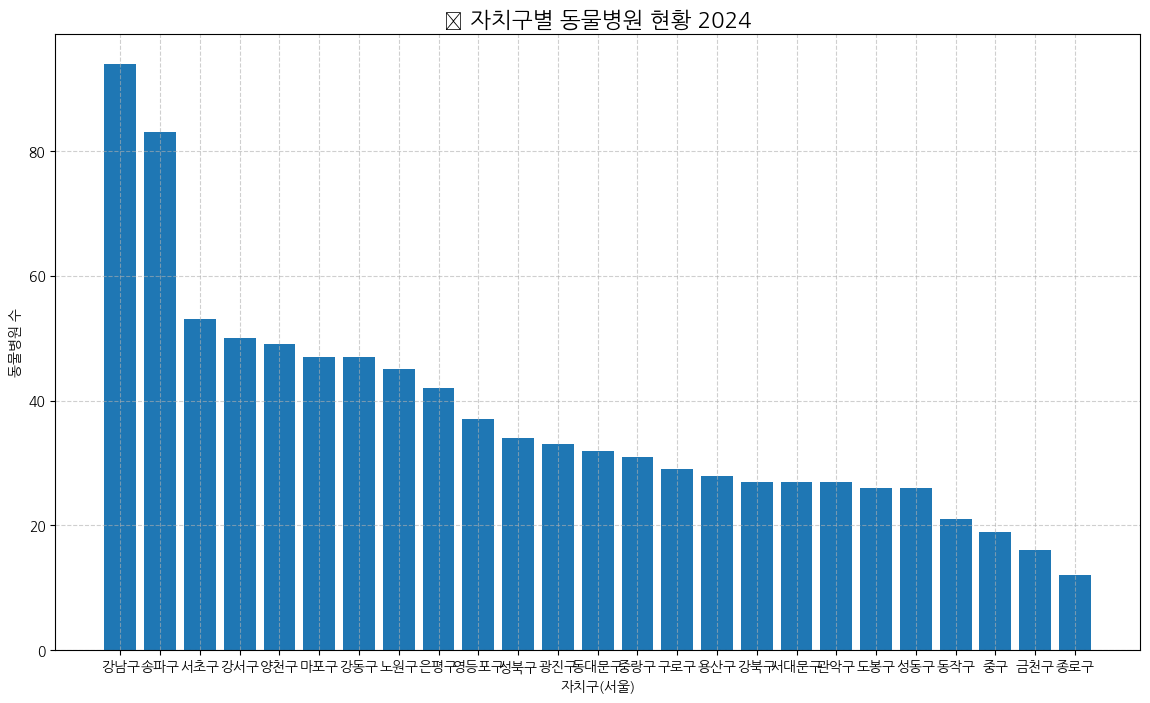

In [37]:
# ▶️ 시각화 (자치구별 연도별 유기견 발생 추이)
plt.figure(figsize=(14, 8))
plt.bar(district_counts['district'], district_counts['hospital_count'])
plt.title("✅ 자치구별 동물병원 현황 2024", fontsize=16)
plt.xlabel("자치구(서울)")
plt.ylabel("동물병원 수")
plt.grid(True, linestyle='--', alpha=0.6)
# plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
# plt.tight_layout()
plt.show()

In [18]:
# query = """
# DESCRIBE animal_hospital_registry
# """
# pd.read_sql(query, engine)

,Field,Type,Null,Key,Default,Extra
0,id,int,NO,PRI,None,auto_increment
1,number,int,YES,,None,
2,service_name_open,varchar(255),YES,,None,
3,service_id_open,varchar(255),YES,,None,
4,open_gov_code,int,YES,,None,
5,mgmt_num,int,YES,,None,
6,licensg_de,date,YES,,None,
7,licensg_cncl_de,float,YES,,None,
8,status_code,int,YES,,None,
9,status_name,varchar(255),YES,,None,
